# Rendimiento de estudiantes de secundaria

# Abstract

# Análisis del Dataset

In [70]:
import pandas as pd
df= pd.read_csv('Student_performance_data.csv',sep=',')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
#Detalle de la cantidad de filas y columnas
df.shape

(2392, 15)

In [5]:
#Verificación de valores nulos por columna
print(df.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
#Remover la columna de Student ID
df1 = df.drop(columns=['StudentID'])

In [77]:
#Resumen estadístico
df1.describe().round(2)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.00,2392.0,2392.00,2392.00,2392.00
mean,16.47,0.51,0.88,1.75,9.77,14.54,0.30,2.12,0.38,0.30,0.2,0.16,1.91,2.98
std,1.12,0.50,1.03,1.00,5.65,8.47,0.46,1.12,0.49,0.46,0.4,0.36,0.92,1.23
min,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
25%,15.00,0.00,0.00,1.00,5.04,7.00,0.00,1.00,0.00,0.00,0.0,0.00,1.17,2.00
50%,16.00,1.00,0.00,2.00,9.71,15.00,0.00,2.00,0.00,0.00,0.0,0.00,1.89,4.00
75%,17.00,1.00,2.00,2.00,14.41,22.00,1.00,3.00,1.00,1.00,0.0,0.00,2.62,4.00
max,18.00,1.00,3.00,4.00,19.98,29.00,1.00,4.00,1.00,1.00,1.0,1.00,4.00,4.00


In [ ]:
# Importar librería Matplotlib y Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

## Gráfico de líneas: Relación entre el Apoyo Parental y el GPA

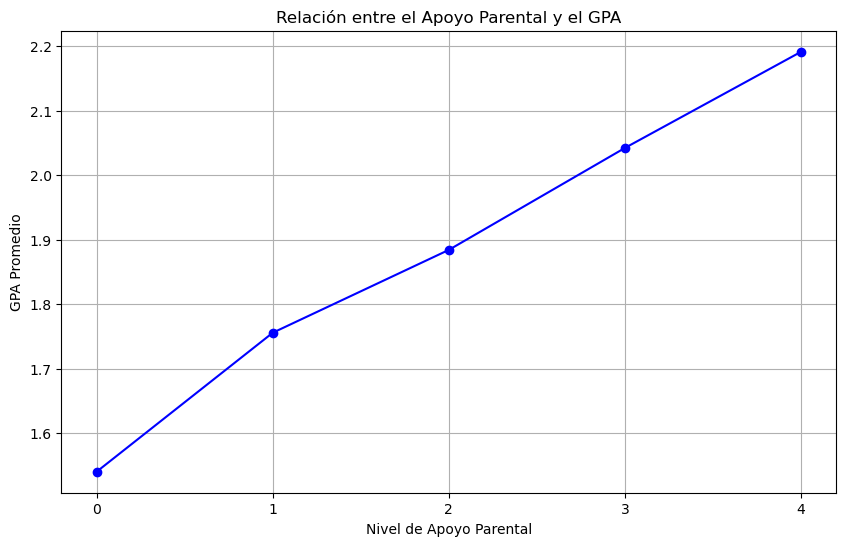

In [76]:
# Calcular el GPA promedio para cada nivel de apoyo parental
avg_gpa_by_support = df.groupby('ParentalSupport')['GPA'].mean().reset_index()

# Graficar la relación entre el apoyo parental y el GPA
plt.figure(figsize=(10, 6))
plt.plot(avg_gpa_by_support['ParentalSupport'], avg_gpa_by_support['GPA'], marker='o', linestyle='-', color='blue')

plt.xlabel('Nivel de Apoyo Parental')
plt.ylabel('GPA Promedio')
plt.title('Relación entre el Apoyo Parental y el GPA')
plt.xticks(avg_gpa_by_support['ParentalSupport'])  
plt.grid(True)
plt.show()

Este gráfico nos permite visualizar de forma clara que la relación entre el apoyo parental y el GPA tiene una pendiente positiva, por ende, a mayor apoyo parental, el GPA tiende a ser más alto, de cualquier forma al ir de 0 a 4 en el apoyo parental, solo se aumenta un 0.6 de GPA (de 1.6 a 2.2) lo que no parece ser un número muy significativo. Gráficos posteriores nos ayudarán a visualizar mejor su impacto.

## Boxplot: Distribución del GPA según el Nivel de Apoyo Parental

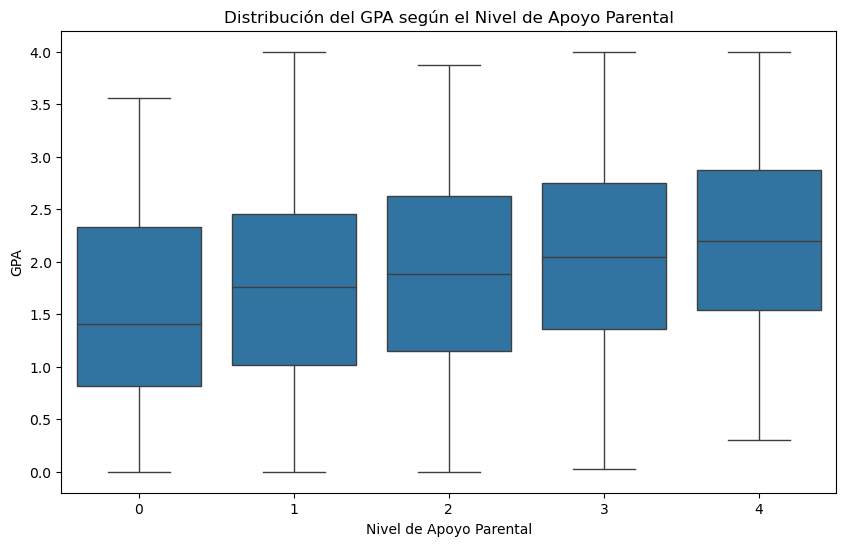

In [94]:
# Graficar la Distribución del GPA según el Nivel de Apoyo Parental
plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalSupport', y='GPA', data=df)

plt.xlabel('Nivel de Apoyo Parental')
plt.ylabel('GPA')
plt.title('Distribución del GPA según el Nivel de Apoyo Parental')
plt.show()

Este gráfico profundiza lo ya mostrado en el gráfico anterior. Se puede apreciar que la mediana del GPA tiende a aumentar con niveles más altos de apoyo parental, lo que continúa sugiriendo que un mayor apoyo parental está asociado con un mejor rendimiento académico.

## Gráfico de Barras: Distribución de las Actividades Extracurriculares

In [73]:
# Lista de actividades extracurriculares
activities = ['Sports', 'Music', 'Volunteering']

# Calcular cuántos estudiantes participan en cada actividad
counts = df[activities].sum()

# Calcular cuántos estudiantes no participan en ninguna actividad
no_activity_count = (df[activities].sum(axis=1) == 0).sum()

# Agregar la categoría "No Participation" al conteo
counts['No Participation'] = no_activity_count

counts_df.head()

,Actividad,Cantidad de Estudiantes
0,Sports,726
1,Music,471
2,Volunteering,376
3,No Participation,1120


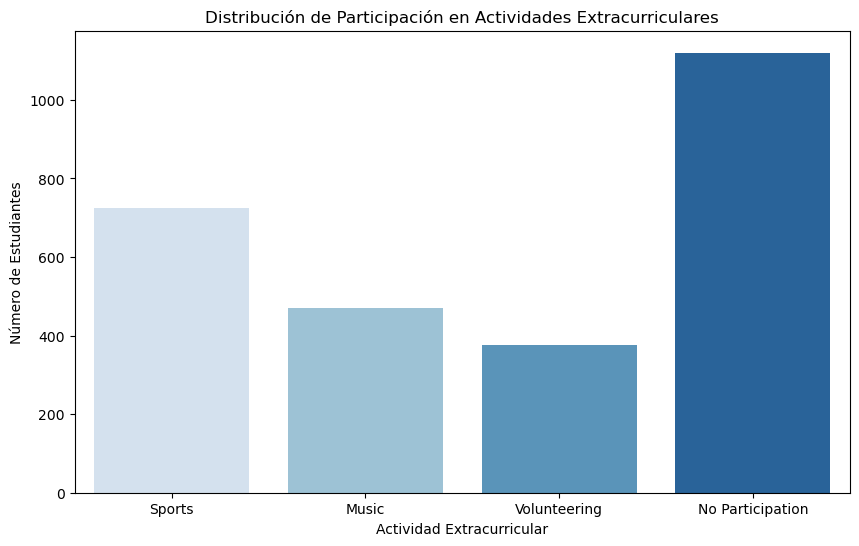

In [75]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='Blues', legend=False)
plt.xlabel('Actividad Extracurricular')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de Participación en Actividades Extracurriculares')
plt.show()

Este gráfico ofrece una vista clara de las preferencias de los estudiantes, lo que puede ser valioso para los responsables de la toma de decisiones en un entorno educativo. Se observa que una gran parte de los estudiantes no está involucrada en actividades extracurriculares, se podria analizar cuál es el motivo (falta de interés, acceso limitado, etc)

## Gráfico de líneas mejorado: Media del GPA por Actividad Extracurricular

In [95]:
# Crear una nueva columna que indique la actividad en la que participa cada estudiante
df['Activity_Participation'] = 'No Participation'
df.loc[df['Sports'] == 1, 'Activity_Participation'] = 'Sports'
df.loc[df['Music'] == 1, 'Activity_Participation'] = 'Music'
df.loc[df['Volunteering'] == 1, 'Activity_Participation'] = 'Volunteering'

# Calcular la media del GPA por actividad
gpa_means = df.groupby('Activity_Participation')['GPA'].mean()
print(gpa_means)

Activity_Participation
Music               2.023164
No Participation    1.838015
Sports              1.961667
Volunteering        1.913089
Name: GPA, dtype: float64


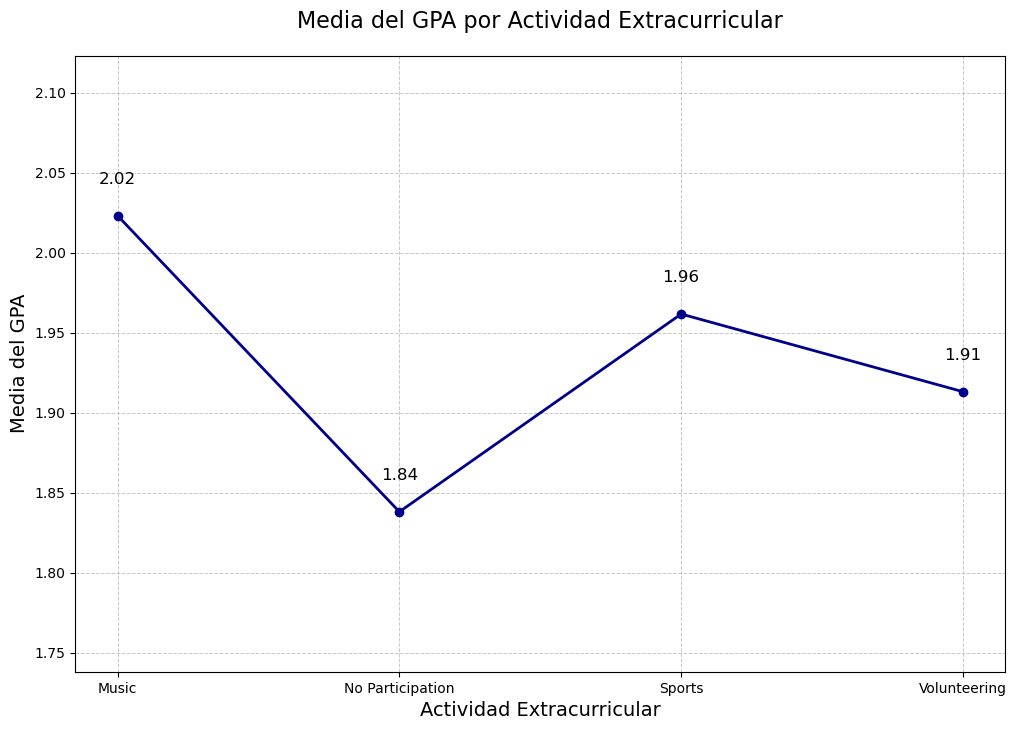

In [89]:
# Graficar las medias de GPA en un gráfico de líneas mejorado
plt.figure(figsize=(12, 8))
plt.plot(gpa_means.index, gpa_means.values, marker='o', linestyle='-', color='darkblue', linewidth=2)
for i, value in enumerate(gpa_means.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12, color='black')
plt.xlabel('Actividad Extracurricular', fontsize=14)
plt.ylabel('Media del GPA', fontsize=14)
plt.title('Media del GPA por Actividad Extracurricular', fontsize=16, pad=20)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.ylim(gpa_means.min() - 0.1, gpa_means.max() + 0.1)
plt.show()

Se muestra cómo el GPA promedio varía según la participación en diferentes actividades extracurriculares. En este caso el rango va de 1.84 a 2.02 por ende la amplitud no es muy grande. Si bien aquellos que no participan de actividades son quienes tienen un promedio de GPA más bajo y aquellos que participan de actividades relacionadas con la múásica el más alto. La mejora no parece ser significativa. 

## Histograma: Distribución de las Faltas por Nivel Educativo de los Padres

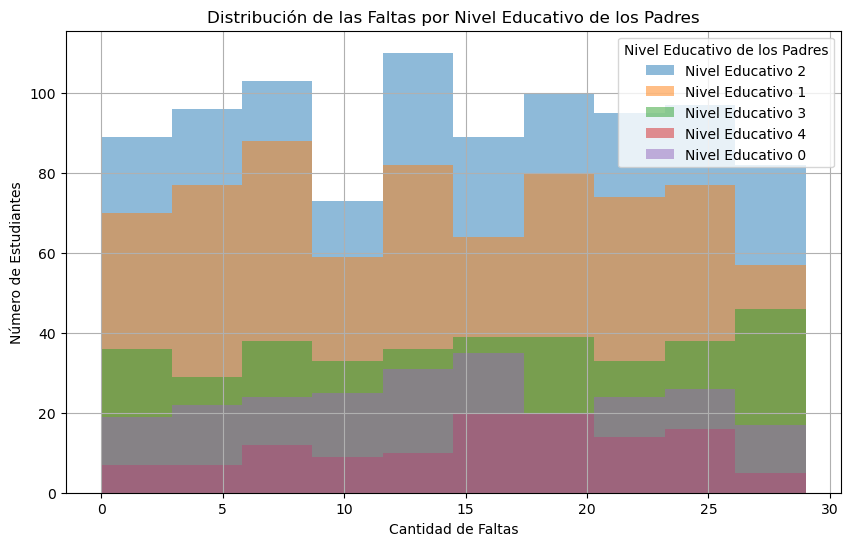

In [92]:
plt.figure(figsize=(10, 6))

# Histograma separado por nivel educativo de los padres
levels_of_education = df['ParentalEducation'].unique()
for level in levels_of_education:
    subset = df[df['ParentalEducation'] == level]
    plt.hist(subset['Absences'], bins=10, alpha=0.5, label=f'Nivel Educativo {level}')

plt.xlabel('Cantidad de Faltas')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de las Faltas por Nivel Educativo de los Padres')
plt.legend(title='Nivel Educativo de los Padres')
plt.grid(True)

plt.show()

Los estudiantes con padres de un nivel educativo superior (4), muestran un rango máximo de faltas entre 15 y 20, sin embargo los estudiantes con padres de un nivel educativo medio (2), tienen un rango máximo de faltas entre 10 y 15.

## Gráfico de puntos: Relación entre Faltas, GPA y Nivel Educativo de los Padres

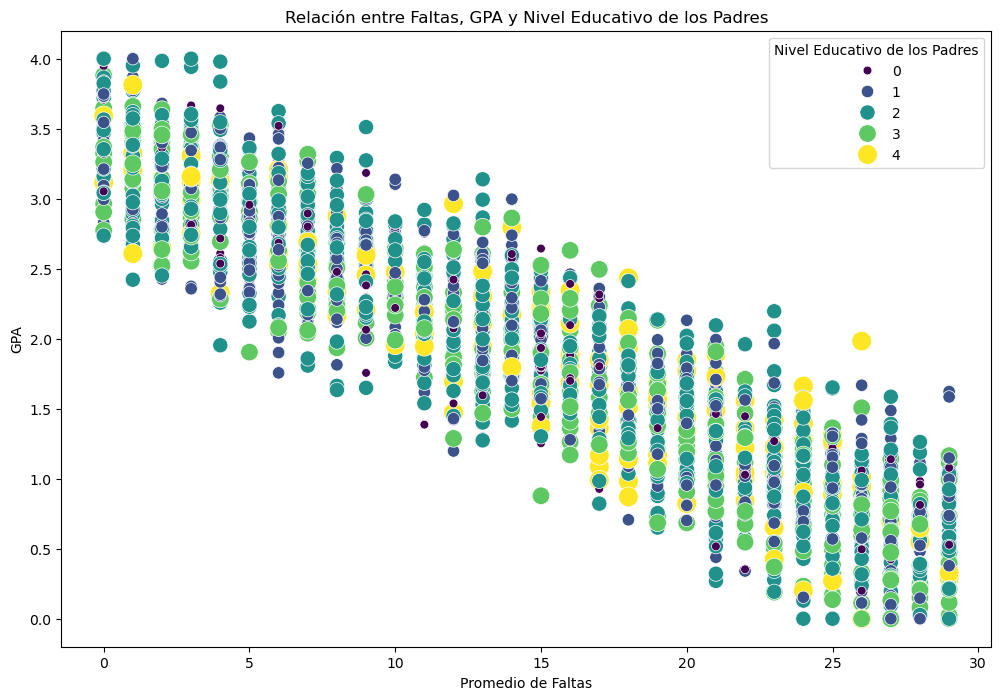

In [93]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Absences', y='GPA', hue='ParentalEducation', palette='viridis', size='ParentalEducation', data=df, sizes=(40, 200))

plt.xlabel('Promedio de Faltas')
plt.ylabel('GPA')
plt.title('Relación entre Faltas, GPA y Nivel Educativo de los Padres')
plt.legend(title='Nivel Educativo de los Padres')
plt.show()

En general, se puede concluir que existe una relación entre el número de faltas y el GPA. Los estudiantes que faltan más a clase tengan un GPA más bajo, lo que sugiere que la asistencia regular es clave para un buen rendimiento académico.
Como vimos en el grafico anterior, el nivel educativo de los padres no parece influenciar, tanto como se pensaría en un principio, en la cantidad de faltas

In [ ]:
## Mapa de Calor de Correlaciones

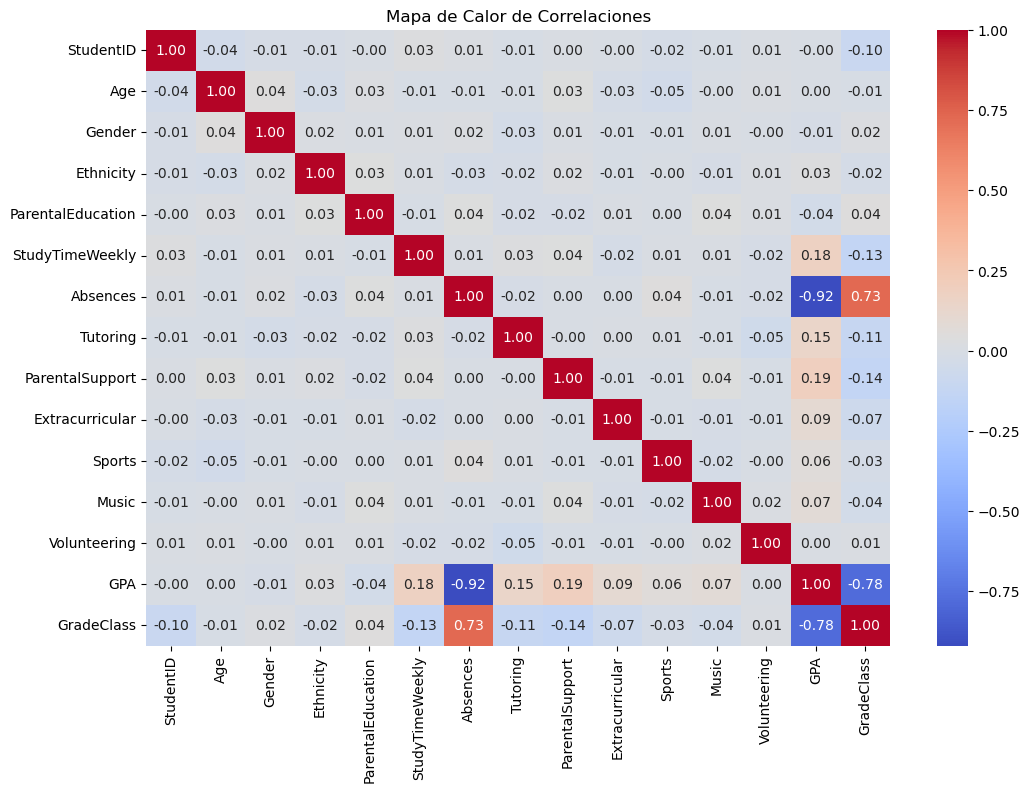

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Este mapa de calor parece indicar que no hay una correlación significativa entre las variables del conjunto de datos, excepto por la variable faltas (Absences). La variable Grade Class también se destaca, lo que es lógico ya que en sí esta basada en el GPA

# Análisis de outliers

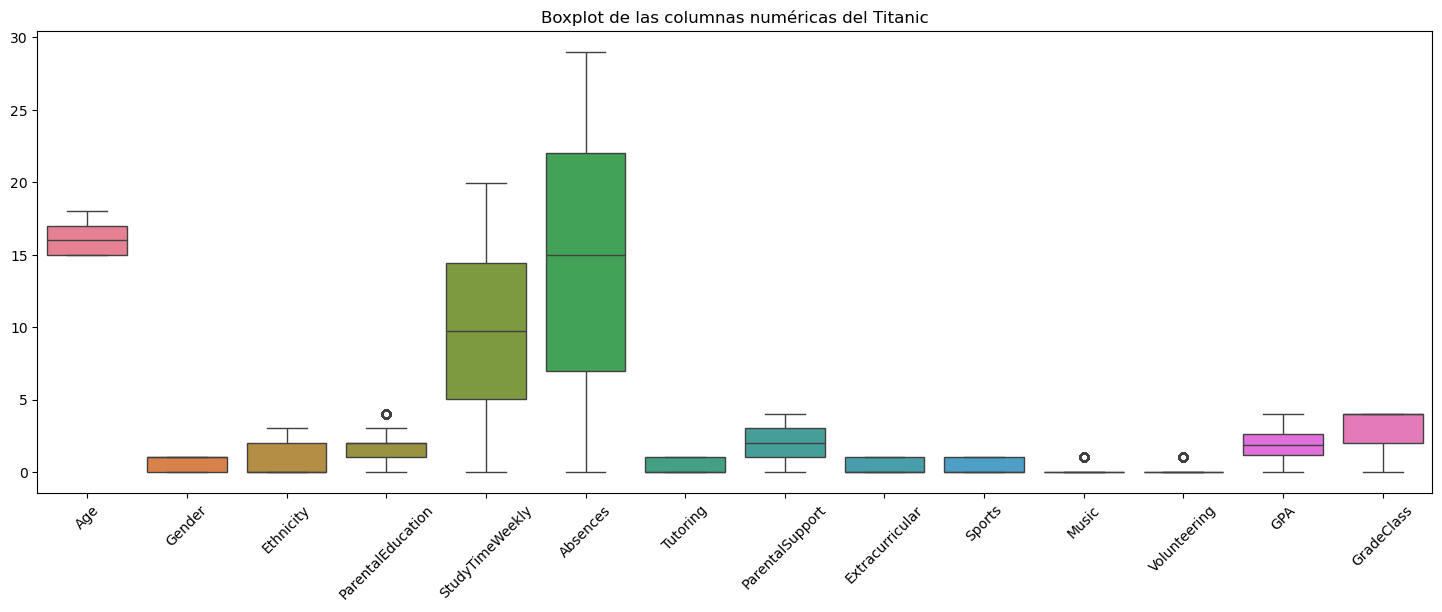

In [50]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df1)
plt.title("Boxplot de todas las columnas")
plt.xticks(rotation=45)
plt.show()

## Identificar outliers de Parental Education

In [52]:
# Calcular Q1, Q3 e IQR
Q1 = df1['ParentalEducation'].quantile(0.25)
Q3 = df1['ParentalEducation'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)


1.0 2.0


In [62]:
pd.set_option('display.max_rows', None)
# Calcular los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar outliers
outliers = df1[(df1['ParentalEducation'] < limite_inferior) | (df1['ParentalEducation'] > limite_superior)]

# Mostrar outliers
print(f'Los outliers detectados están en las filas: ', outliers['ParentalEducation'].index)

Los outliers detectados están en las filas:  Index([   7,   23,   56,   57,   66,  122,  136,  148,  182,  184,
       ...
       2055, 2078, 2085, 2127, 2175, 2178, 2238, 2243, 2318, 2368],
      dtype='int64', length=120)
